In [74]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
import random
from IPython import display

In [75]:
local_string = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\5minTest.csv'
indoorData = pd.read_csv(local_string)
indoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,16:13:21,1,2,3,23.923555,15544,16.210994,1012.329937,7.662967,NaN
1,16:13:23,1,2,3,23.937812,5021,16.211696,1012.328199,7.677450,NaN
2,16:13:24,0,1,2,23.969453,9966,16.188729,1012.329972,7.662683,NaN
3,16:13:25,0,1,2,24.000508,14292,16.146121,1012.325614,7.698987,NaN
4,16:13:26,0,1,2,24.029414,17669,16.103419,1012.329637,7.665467,NaN
...,...,...,...,...,...,...,...,...,...,...
247,16:18:16,0,1,1,24.386250,61659,15.572760,1012.353234,7.468870,NaN
248,16:18:18,0,1,1,24.385078,61704,15.553176,1012.354694,7.456701,NaN
249,16:18:19,0,1,1,24.383516,61568,15.562865,1012.352069,7.478569,NaN
250,16:18:20,0,1,1,24.382734,61433,15.543302,1012.352472,7.475218,NaN


In [76]:
local_string1 = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\OutdoorData.csv'
outdoorData = pd.read_csv(local_string1)
outdoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,14:59:39,1,6,8,21.294648,8733,24.916397,997.310859,133.557492,NaN
1,14:59:41,1,6,7,21.310859,963,24.676618,997.308800,133.574858,NaN
2,14:59:42,0,5,6,21.346016,1465,24.438582,997.314338,133.528158,NaN
3,14:59:43,0,5,6,21.380977,1983,24.242660,997.319546,133.484234,NaN
4,14:59:44,0,4,6,21.412031,2517,24.109254,997.326789,133.423152,NaN
...,...,...,...,...,...,...,...,...,...,...
348,15:06:35,0,1,1,20.327852,69028,20.167744,996.219137,142.768355,NaN
349,15:06:36,0,1,1,20.282734,69601,20.185267,996.220798,142.754333,NaN
350,15:06:37,0,1,1,20.243281,69834,20.213192,996.226754,142.704057,NaN
351,15:06:39,0,1,1,20.190156,69834,20.235287,996.223603,142.730653,NaN


In [77]:
time_mask = outdoorData['Time']>'15:01:39'
goodOutdoorData = outdoorData[time_mask]
goodOutdoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
101,15:01:40,1,1,2,14.836445,42426,27.646399,996.367843,141.513241,NaN
102,15:01:41,1,1,2,14.824141,42729,28.223678,996.428321,141.002834,NaN
103,15:01:43,1,1,2,14.796211,42992,27.918976,996.400202,141.240141,NaN
104,15:01:44,1,1,2,14.756562,43437,27.947905,996.382881,141.386325,NaN
105,15:01:45,1,1,2,14.708906,43709,27.933819,996.384242,141.374834,NaN
...,...,...,...,...,...,...,...,...,...,...
348,15:06:35,0,1,1,20.327852,69028,20.167744,996.219137,142.768355,NaN
349,15:06:36,0,1,1,20.282734,69601,20.185267,996.220798,142.754333,NaN
350,15:06:37,0,1,1,20.243281,69834,20.213192,996.226754,142.704057,NaN
351,15:06:39,0,1,1,20.190156,69834,20.235287,996.223603,142.730653,NaN


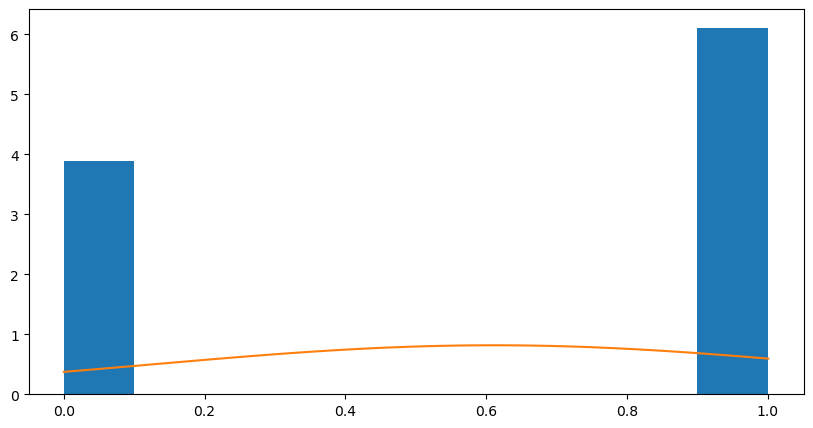

In [78]:
meanPM1 = indoorData['PM 1.0'].mean()
stdPM1 = indoorData['PM 1.0'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['PM 1.0'],density = True);
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),meanPM1,stdPM1));

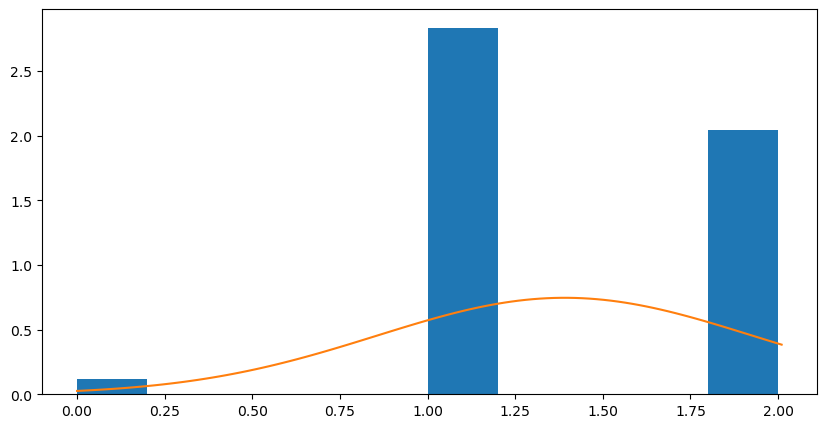

In [79]:
meanPM25 = indoorData['PM 2.5'].mean()
stdPM25 = indoorData['PM 2.5'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['PM 2.5'],density = True);
ax1.plot(np.linspace(0,2.01,100), norm.pdf(np.linspace(0,2.001,100),meanPM25,stdPM25));

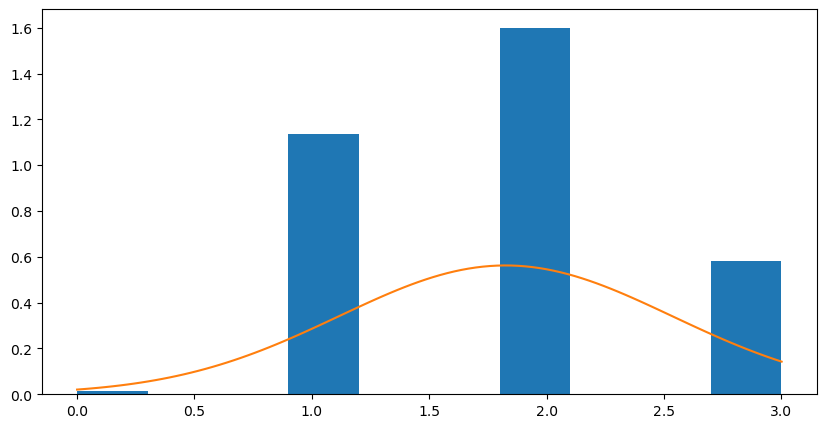

In [81]:
meanPM10 = indoorData['PM 10'].mean()
stdPM10 = indoorData['PM 10'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['PM 10'],density = True);
ax1.plot(np.linspace(0,3.001,100), norm.pdf(np.linspace(0,3.001,100),meanPM10,stdPM10));

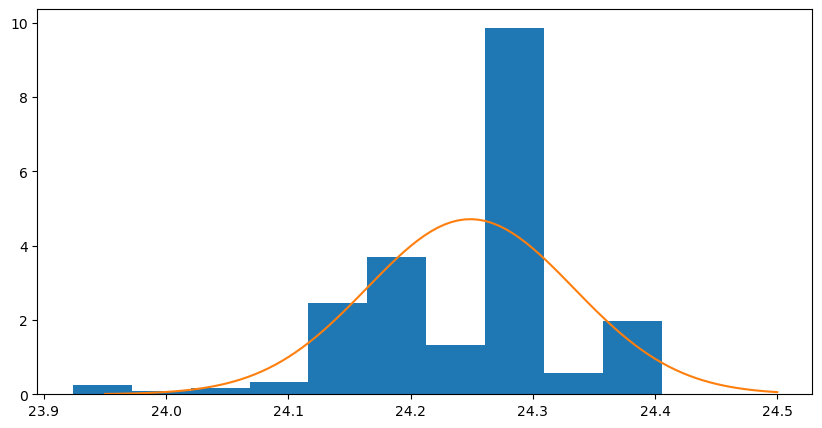

In [82]:
meanT = indoorData['Temperature'].mean()
stdT = indoorData['Temperature'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['Temperature'],density = True);
ax1.plot(np.linspace(23.95,24.5,100), norm.pdf(np.linspace(23.95,24.5,100),meanT,stdT));

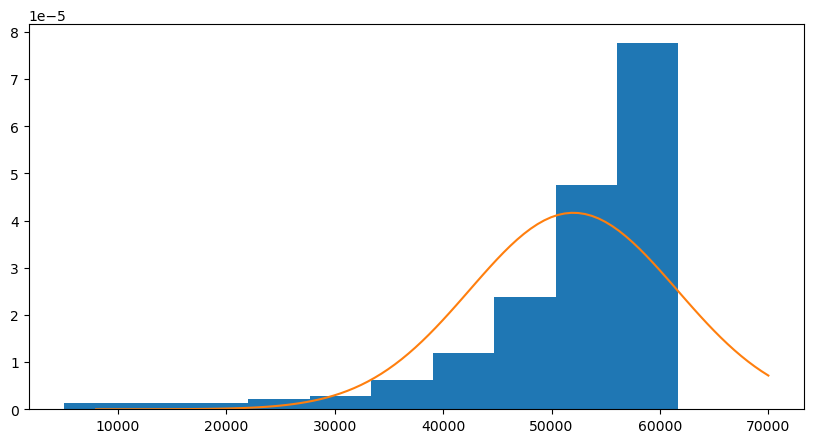

In [84]:
meanG = indoorData['Gas'].mean()
stdG = indoorData['Gas'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['Gas'],density = True);
ax1.plot(np.linspace(8000,70000,100), norm.pdf(np.linspace(8000,70000,100),meanG,stdG));

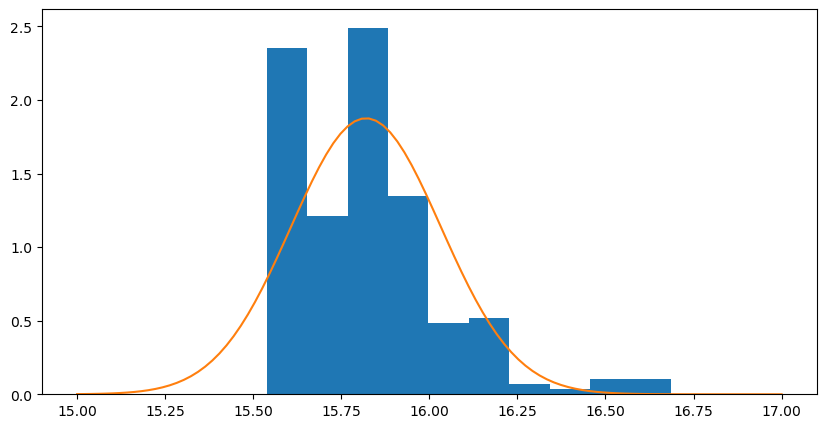

In [87]:
meanH = indoorData['Humidity'].mean()
stdH = indoorData['Humidity'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['Humidity'],density = True);
ax1.plot(np.linspace(15,17,100), norm.pdf(np.linspace(15,17,100),meanH,stdH));

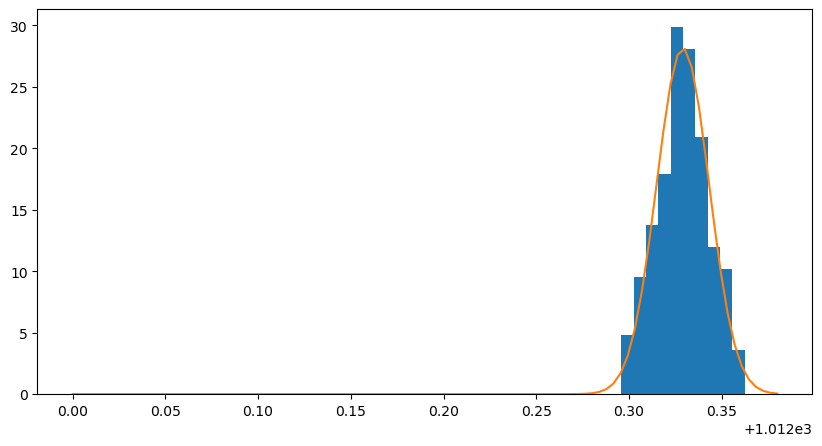

In [116]:
meanP = indoorData['Pressure'].mean()
stdP = indoorData['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['Pressure'],density = True);
ax1.plot(np.linspace(1012,1012.38,100), norm.pdf(np.linspace(1012,1012.38,100),meanP,stdP));

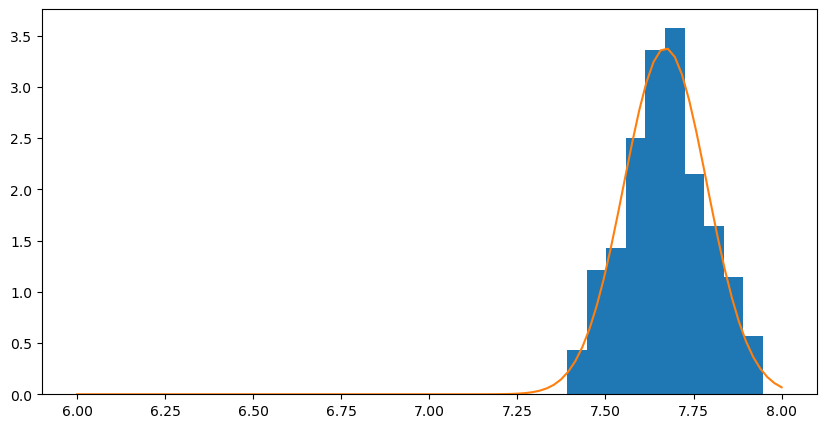

In [119]:
meanA = indoorData['Altitude'].mean()
stdA = indoorData['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(indoorData['Altitude'],density = True);
ax1.plot(np.linspace(6,8,100), norm.pdf(np.linspace(6,8,100),meanA,stdA));

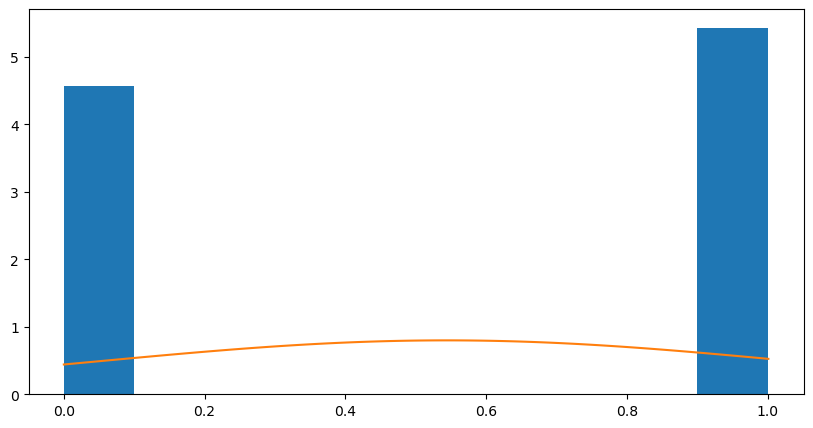

In [121]:
mean1o = goodOutdoorData['PM 1.0'].mean()
std1o = goodOutdoorData['PM 1.0'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['PM 1.0'],density = True);
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),mean1o,std1o));

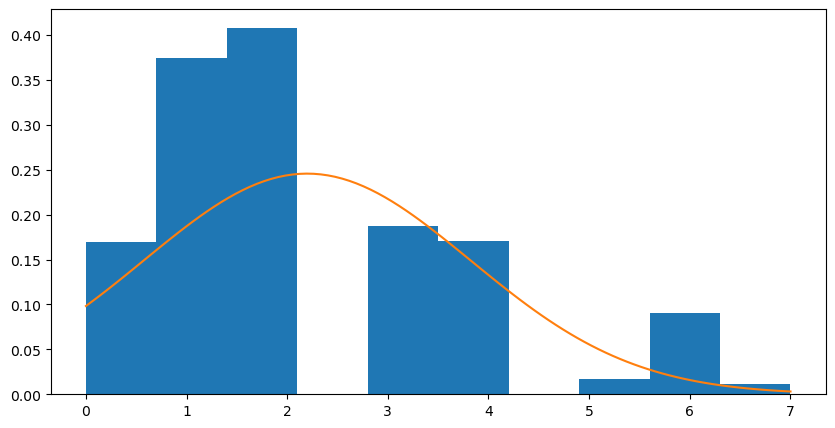

In [123]:
mean25o = goodOutdoorData['PM 2.5'].mean()
std25o = goodOutdoorData['PM 2.5'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['PM 2.5'],density = True);
ax1.plot(np.linspace(0,7.001,100), norm.pdf(np.linspace(0,7.001,100),mean25o,std25o));

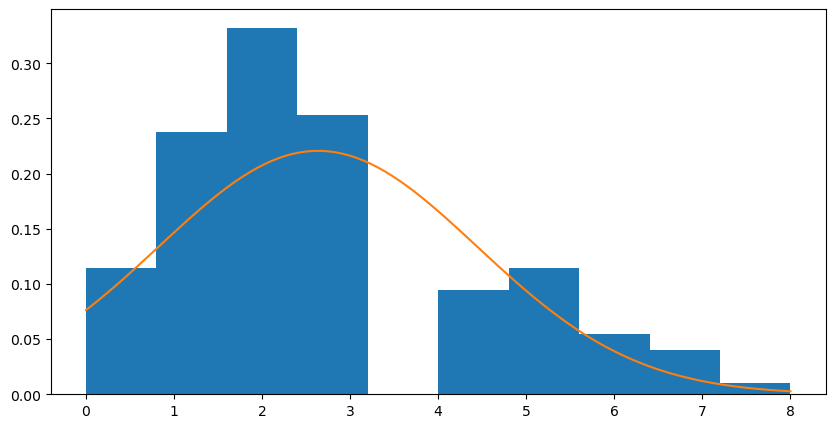

In [125]:
mean10o = goodOutdoorData['PM 10'].mean()
std10o = goodOutdoorData['PM 10'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['PM 10'],density = True);
ax1.plot(np.linspace(0,8.001,100), norm.pdf(np.linspace(0,8.001,100),mean10o,std10o));

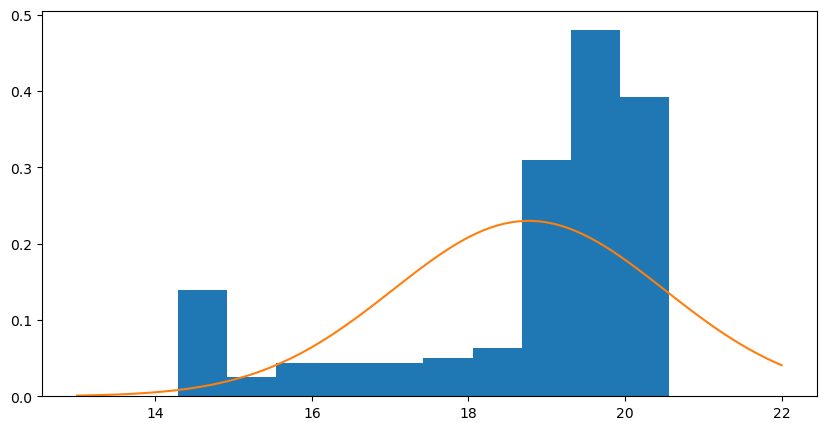

In [128]:
meanTo = goodOutdoorData['Temperature'].mean()
stdTo = goodOutdoorData['Temperature'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['Temperature'],density = True);
ax1.plot(np.linspace(13,22,100), norm.pdf(np.linspace(13,22,100),meanTo,stdTo));

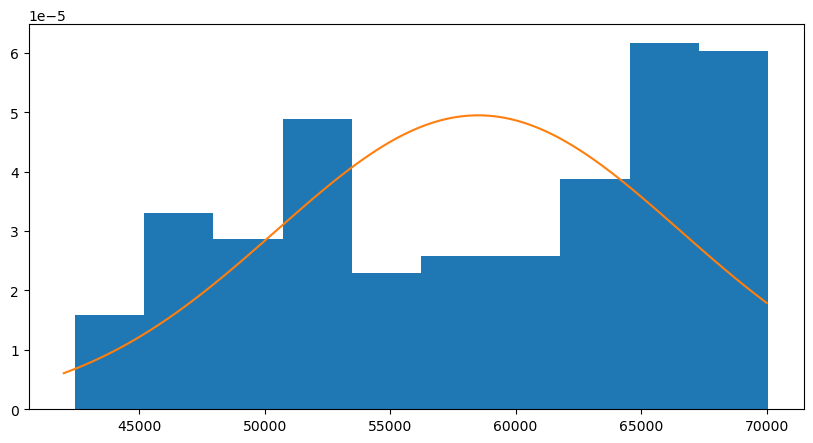

In [132]:
meanGo = goodOutdoorData['Gas'].mean()
stdGo = goodOutdoorData['Gas'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['Gas'],density = True);
ax1.plot(np.linspace(42000,70000.01,100), norm.pdf(np.linspace(42000,70000.1,100),meanGo,stdGo));

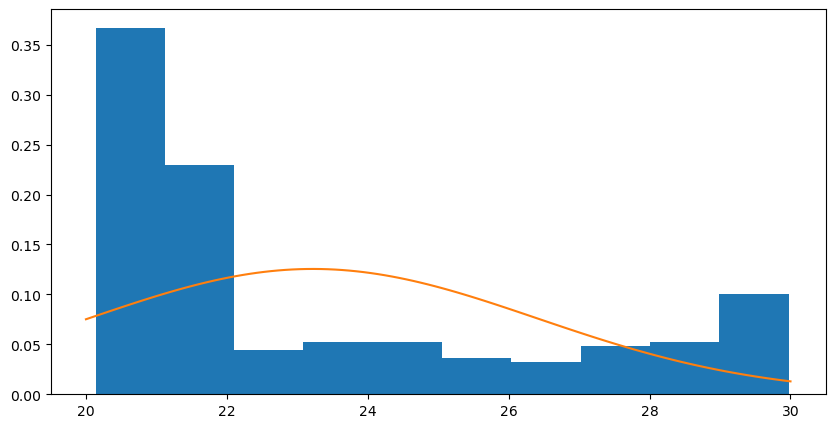

In [134]:
meanHo = goodOutdoorData['Humidity'].mean()
stdHo = goodOutdoorData['Humidity'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['Humidity'],density = True);
ax1.plot(np.linspace(20,30.001,100), norm.pdf(np.linspace(20,30.001,100),meanHo,stdHo));

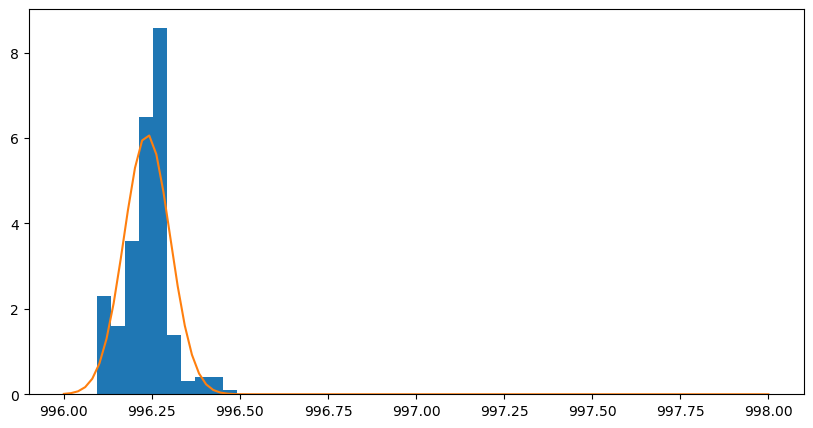

In [137]:
meanPo = goodOutdoorData['Pressure'].mean()
stdPo = goodOutdoorData['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['Pressure'],density = True);
ax1.plot(np.linspace(996,998,100), norm.pdf(np.linspace(996,998,100),meanPo,stdPo));

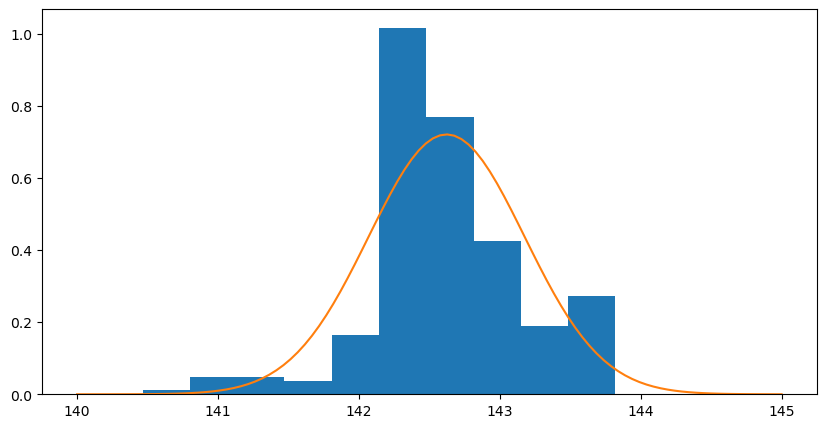

In [139]:
meanAo = goodOutdoorData['Altitude'].mean()
stdAo = goodOutdoorData['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
ax1.hist(goodOutdoorData['Altitude'],density = True);
ax1.plot(np.linspace(140,145,100), norm.pdf(np.linspace(140,145,100),meanAo,stdAo));

In [ ]:
uncertainty / sqrt(observation)